In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [18]:
 tf.__version__

'2.7.0'

In [19]:
np.set_printoptions(precision=3, suppress=True)

In [20]:
#Load Data using Pandas
col_name = ['MPG', 'Cyl', 'CC', 'HP', 'Wt','Acc', 'Model', 'Origin']
load_data = pd.read_csv('auto-fuel.data', sep=' ', names=col_name, skipinitialspace=True, na_values='?', comment='\t')

In [21]:
#Copy and View Data
fueldata = load_data.copy()
fueldata.tail()

,MPG,Cyl,CC,HP,Wt,Acc,Model,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [22]:
#Check unknown values
fueldata.isna().sum()

MPG       0
Cyl       0
CC        0
HP        6
Wt        0
Acc       0
Model     0
Origin    0
dtype: int64

In [23]:
#Drop the unknown values
fueldata = fueldata.dropna() 

In [24]:
fueldata['Origin'] = fueldata['Origin'].map({1: 'USA', 2: 'EUR', 3: 'JPN'})
fueldata = pd.get_dummies(fueldata, columns=['Origin'], prefix='', prefix_sep='') 
fueldata.tail()

,MPG,Cyl,CC,HP,Wt,Acc,Model,EUR,JPN,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [29]:
#Train Test Split
train_data = fueldata.sample(frac=0.8, random_state=0)
test_data = fueldata.drop(train_data.index)

In [31]:
#Split features and labels
trnfeature = train_data.copy()
tstfeature = test_data.copy()
trnlbl = trnfeature.pop('MPG')
tstlbl = tstfeature.pop('MPG')

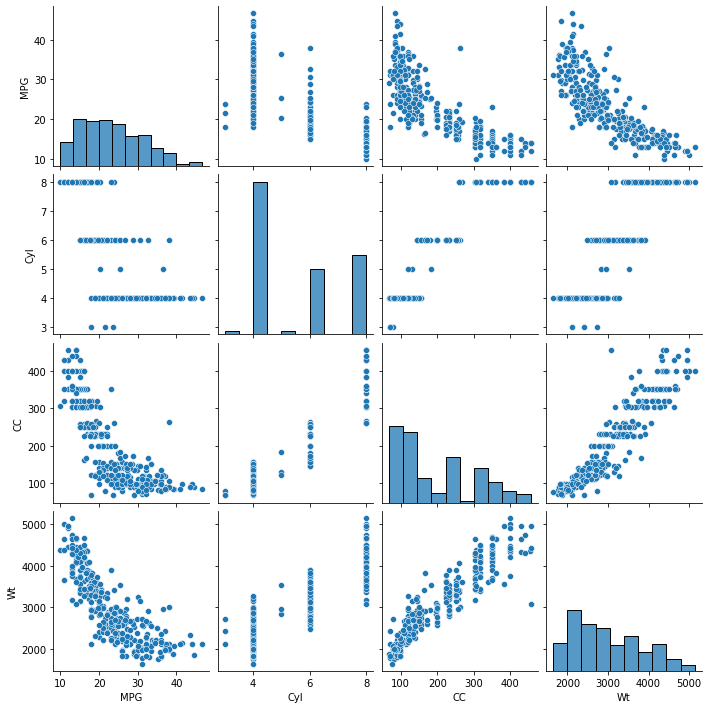

In [32]:
#View the Data
sns.pairplot(trndata[['MPG', 'Cyl', 'CC', 'Wt']]) 

In [33]:
#Statistical Analysis of Data
trndata.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cyl,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
CC,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
HP,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Wt,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acc,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
EUR,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
JPN,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [34]:
#Check the difference in mean and standard deviation of each feature
trndata.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cyl,5.477707,1.699788
CC,195.318471,104.331589
HP,104.869427,38.096214
Wt,2990.251592,843.898596
Acc,15.559236,2.789230
Model,75.898089,3.675642
EUR,0.178344,0.383413
JPN,0.197452,0.398712
USA,0.624204,0.485101


In [35]:
#One Input Variable

#Create Normalization Layer
hp=np.array(trnfeature['HP'])
hp_normdata = preprocessing.Normalization(input_shape=[1,], axis=None)
hp_normdata.adapt(np.array(trnfeature['HP']))

In [36]:
#Build Sequential Model
hpmodel = tf.keras.Sequential([hp_normdata,layers.Dense(units=1)])
hpmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [37]:
#Configure Training Procedures
hpmodel.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [38]:
#Execute the training
history = hpmodel.fit(trnfeature['HP'], trnlbl, epochs=100, verbose=0, validation_split = 0.2)  

In [39]:
#Analyse history object
#View the statistics stored in history object
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()   

,loss,val_loss,epoch
95,3.804497,4.167560,95
96,3.803305,4.180387,96
97,3.804338,4.207663,97
98,3.802830,4.192491,98
99,3.803488,4.189670,99


In [40]:
def pltloss(history):
    plt.plot(history.history['loss'], label='loss') 
    plt.plot(history.history['val_loss'], label='val_loss') 
    plt.ylim([0, 10]) 
    plt.xlabel('Epoch') 
    plt.ylabel('Error [MPG]') 
    plt.legend() 
    plt.grid(True)
    plt.show()



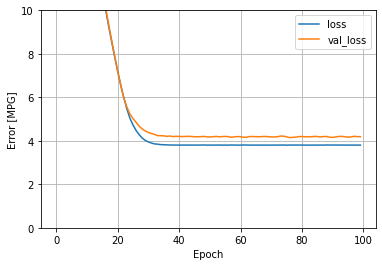

In [41]:
pltloss(history)


In [43]:
#Store the results
tstres = {}
tstres['HP_model'] = hpmodel.evaluate(tstfeature['HP'],tstlbl, verbose=0)

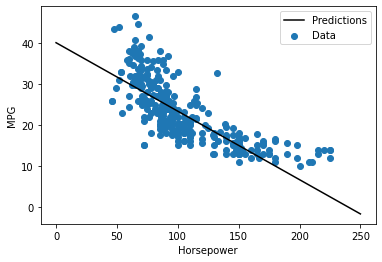

In [42]:
##Predictions
x = tf.linspace(0.0, 250, 251)

y = hpmodel.predict(x)

def plt_hp(x, y):
    plt.scatter(trnfeature['HP'], trnlbl, label='Data') 
    plt.plot(x, y, color='k', label='Predictions') 
    plt.xlabel('Horsepower') 
    plt.ylabel('MPG') 
    plt.legend() 
    plt.show()

plt_hp(x,y)


In [44]:
#Multiple Input Variables

#Build Model
#Use the Normalization layer adapted to whole dataset (step 30)
normdata = preprocessing.Normalization(axis=-1)
normdata.adapt(np.array(trnfeature))
lm_model = tf.keras.Sequential([normdata,layers.Dense(units=1)])

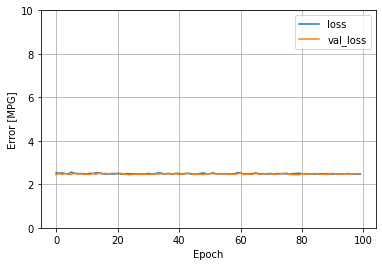

In [46]:
#Configure Training Procedure
lm_model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')
#Execute the Training
history = lm_model.fit(trnfeature, trnlbl, epochs=100, verbose=0, validation_split = 0.2)
#Training and Validation Error
pltloss(history)

In [47]:
#Collect Results - Test Set
tstres['lm_model'] = lm_model.evaluate(tstfeature, tstlbl, verbose=0)

In [49]:
#Deep Neural Network - Regression

def nn_model(norm):
    model = keras.Sequential([ 
        norm, 
        layers.Dense(64, activation='relu'), 
        layers.Dense(64, activation='relu'), 
        layers.Dense(1) 
        ]) 
    model.compile(loss='mean_absolute_error', 
                  optimizer=tf.keras.optimizers.Adam(0.001)) 
    return model

In [50]:
#Deep Neural Network - One Input Variable

nn_hpmodel = nn_model(hp_normdata)
nn_hpmodel.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [51]:
#Train the model
history = nn_hpmodel.fit( trnfeature['HP'], trnlbl, verbose=0, validation_split=0.2, epochs=100)


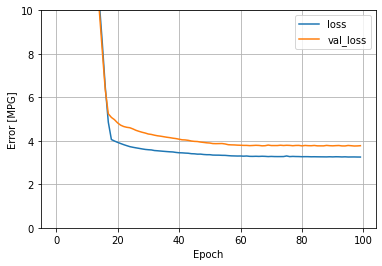

In [52]:
#Plot the results
In [61]: pltloss(history) 

In [53]:
#Deep Neural Network - All Variables

#Build and Compile Model
nn_model = nn_model(normdata)  
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


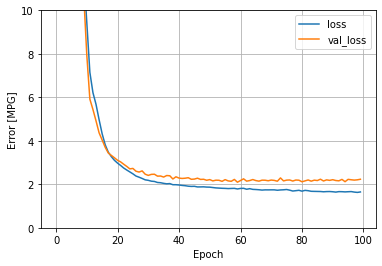

In [54]:
#Train the Model
history = nn_model.fit(trnfeature, trnlbl, verbose=0, validation_split=0.2, epochs=100)



#Plot the result
pltloss(history)


In [55]:
#Save results for the test dataset
tstres['dnn_model'] = nn_model.evaluate(tstfeature, tstlbl, verbose=0)

In [56]:
#Performance

pd.DataFrame(tstres, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
HP_model,3.648406
lm_model,2.445072
dnn_model,1.697721


In [57]:
#Prediction
tstpred = nn_model.predict(tstfeature).flatten()        


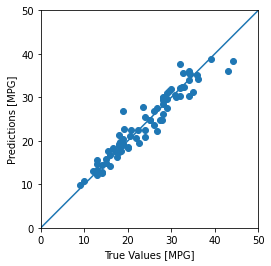

In [58]:
a = plt.axes(aspect='equal')
plt.scatter(tstlbl, tstpred) 
plt.xlabel('True Values [MPG]') 
plt.ylabel('Predictions [MPG]') 
lims = [0, 50] 
plt.xlim(lims) 
plt.ylim(lims) 
_ = plt.plot(lims, lims) 
plt.show()     


In [59]:
#Error Distribution
error = tstpred - tstlbl

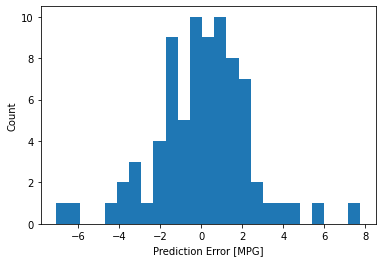

In [60]:
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]') 
_ = plt.ylabel('Count') 
plt.show()